## Ejercicio 7.1
*Kassimali, A. (2012). Matrix Analysis of Structures. 2nd Edition. Cengage Learning.*

![NON](img/ejercicio_7.1.png)

In [1]:
from PyStructMatrix import StructuralMatrixAnalysis, StructuralPlotter

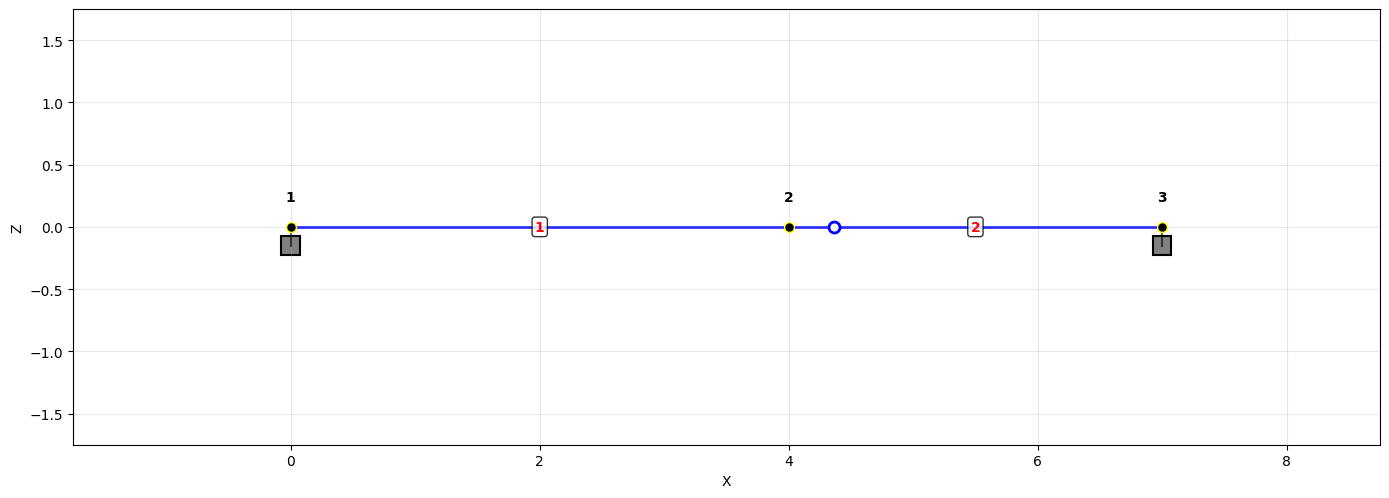

In [2]:
# Crear el sistema estructural
system = StructuralMatrixAnalysis()
plotter = StructuralPlotter(system)

# Definir propiedades del material y secciones
E = 200 * 10e6
A = 1
I = 30 * 10e-6

# Definición de Nodos (Geometría)
system.defineNode(1, x=0, z=0)
system.defineNode(2, x=4, z=0)
system.defineNode(3, x=7, z=0)

# Asignación de Restricciones (Condiciones de Apoyo)
system.assignJoint.restrictions(1, ux=True, uz=True, ry=True)
system.assignJoint.restrictions(3, ux=True, uz=True, ry=True)

# Definición de Elementos (Conectividad)
system.defineElement(1, 1, 2, A=A, E=E, I=I)
system.defineElement(2, 2, 3, A=A, E=E, I=I)

# Asignación de Cargas
system.assignElement.uniformLoad(1, w=37.5)
system.assignElement.uniformLoad(2, w=37.5)
system.assignElement.releases(2, start=True, end=False)

# Visualización Inicial
plotter.showFrame()

In [3]:
# Ejecución del Análisis Matricial
system.RunCompleteAnalysis(show_process=True)


--------------------------------------------------------------------------------
 1. INFORMACIÓN GENERAL
--------------------------------------------------------------------------------
Número de nodos: 3
Número de elementos: 2
Grados de libertad totales: 9
Grados de libertad restringidos (desplazamientos conocidos): 6 de 9
GL restringidos: [0 1 2 6 7 8]
Grados de libertad libres (fuerzas conocidas): 3 de 9
GL libres: [3 4 5]

--------------------------------------------------------------------------------
 2. MATRICES PARTICIONADAS
--------------------------------------------------------------------------------
KAA (3x3):
  |         3 |          4 |          5 |

  | 1166666667 |          0 |          0 |
  |          0 |     179167 |    -225000 |
  |          0 |    -225000 |     600000 |
 
KAB (3x6):
  |         0 |          1 |          2 |          6 |          7 |          8 |
 
  | -500000000 |          0 |          0 | -666666667 |          0 |          0 |
  |          0 |  

In [4]:
# Obtención de Resultados Detallados de Elementos
system.getInfoElements()

ELEMENTO 1: [1, 2]  - Tipo 0
PROPIEDADES
  Longitud: 4.000
  Área (A): 1.0000e+00
  Módulo elástico (E): 2.0000e+09
  Momento de inercia (I): 3.0000e-04
  Liberaciones:  Nodo i = NO | Nodo j = NO
  Orientación: C=1.000 | S=0.000

CARGAS APLICADAS:
  1) Carga uniforme: w=37.500 en toda la longitud

MATRIZ DE TRANSFORMACIÓN T (6x6):
  |      1.000 |      0.000 |      0.000 |      0.000 |      0.000 |      0.000 |
  |     -0.000 |      1.000 |      0.000 |      0.000 |      0.000 |      0.000 |
  |      0.000 |      0.000 |      1.000 |      0.000 |      0.000 |      0.000 |
  |      0.000 |      0.000 |      0.000 |      1.000 |      0.000 |      0.000 |
  |      0.000 |      0.000 |      0.000 |     -0.000 |      1.000 |      0.000 |
  |      0.000 |      0.000 |      0.000 |      0.000 |      0.000 |      1.000 |

MATRIZ DE RIGIDEZ LOCAL K (6x6):
  | 500000000.000 |      0.000 |      0.000 | -500000000.000 |      0.000 |      0.000 |
  |      0.000 | 112500.000 | 225000.000 |      0.00

In [5]:
system.getInfoNodes()

Node 1: (0, 0) - Empotrado
  Desplazamientos: Ux=0.0000e+00, Uz=0.0000e+00, Ry=0.0000e+00
  Fuerzas: Fx=0.000, Fz=122.957, My=191.827

Node 2: (4, 0) - Libre
  Desplazamientos: Ux=0.0000e+00, Uz=-1.0385e-03, Ry=-3.0609e-04
  Fuerzas: Fx=0.000, Fz=0.000, My=0.000

Node 3: (7, 0) - Empotrado
  Desplazamientos: Ux=0.0000e+00, Uz=0.0000e+00, Ry=0.0000e+00
  Fuerzas: Fx=0.000, Fz=139.543, My=-249.880


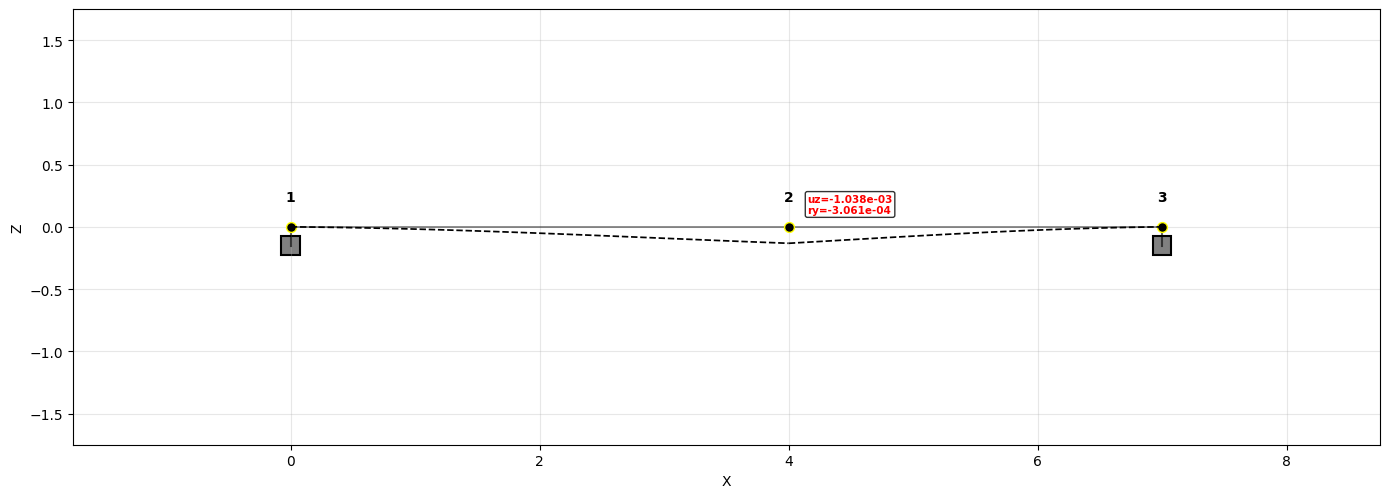

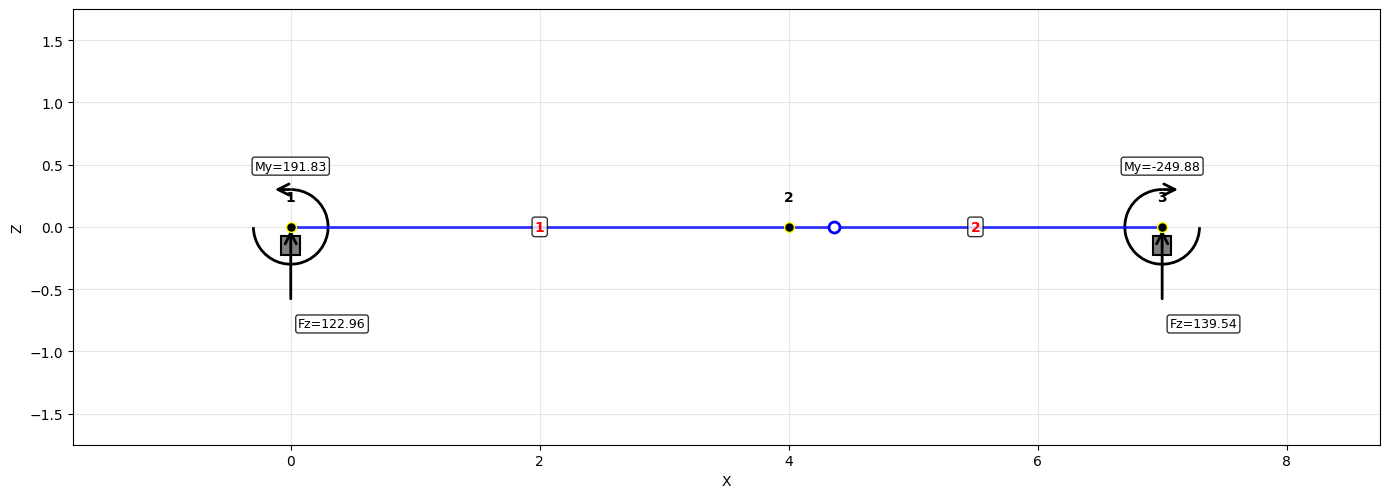

In [6]:
# Visualización de Resultados
plotter.showDeformedShape(escala=0.05)
plotter.showReactions()